In [3]:
import keras
import pandas as pd
from keras import layers, Sequential
import argparse
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop

In [4]:
df = pd.read_csv('gesture_data.csv')
x = df.copy()
y = x.pop('class')
y, class_list = y.factorize()
x = x.astype('float64')
y = keras.utils.to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)
len(x_train)

1623

In [16]:
Model_Checkpoint_Callback = ModelCheckpoint('gesture_model.h5', 
                                            monitor='val_accuracy', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='max',
                                            save_freq = "epoch")
Early_Stop = EarlyStopping(monitor='val_accuracy',
                              patience=10)

In [21]:
model = Sequential()
model.add(Input(shape=(92)))
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=16,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[Model_Checkpoint_Callback,Early_Stop])

Epoch 1/100
 94/102 [==========================>...] - ETA: 0s - loss: 0.8609 - accuracy: 0.6908
Epoch 1: val_accuracy improved from -inf to 0.86946, saving model to gesture_model.h5
102/102 [==============================] - 2s 10ms/step - loss: 0.8289 - accuracy: 0.7024 - val_loss: 0.3313 - val_accuracy: 0.8695
Epoch 2/100
 30/102 [=======>......................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8833

C:\Users\Tommy\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 89/102 [=========================>....] - ETA: 0s - loss: 0.2436 - accuracy: 0.9136
Epoch 2: val_accuracy improved from 0.86946 to 0.93350, saving model to gesture_model.h5
102/102 [==============================] - 1s 6ms/step - loss: 0.2403 - accuracy: 0.9150 - val_loss: 0.1824 - val_accuracy: 0.9335
Epoch 3/100
 88/102 [========================>.....] - ETA: 0s - loss: 0.1488 - accuracy: 0.9574
Epoch 3: val_accuracy improved from 0.93350 to 0.95320, saving model to gesture_model.h5
102/102 [==============================] - 1s 5ms/step - loss: 0.1401 - accuracy: 0.9593 - val_loss: 0.1071 - val_accuracy: 0.9532
Epoch 4/100
 93/102 [==========================>...] - ETA: 0s - loss: 0.0864 - accuracy: 0.9738
Epoch 4: val_accuracy improved from 0.95320 to 0.96552, saving model to gesture_model.h5
102/102 [==============================] - 1s 8ms/step - loss: 0.0829 - accuracy: 0.9754 - val_loss: 0.0750 - val_accuracy: 0.9655
Epoch 5/100
101/102 [============================>.] - ETA: 0

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
import numpy as np
model_test = load_model("gesture_model.h5")
y_pred = model_test.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test=np.argmax(y_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

13/13 [==============================] - 0s 3ms/step
Confusion Matrix
[[50  0  0  0  0  0]
 [ 0 78  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 87  0  0]
 [ 0  0  0  0 58  0]
 [ 0  0  0  0  0 80]]


In [6]:
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_list))

Classification Report
                  precision    recall  f1-score   support

   crossing_arms       1.00      1.00      1.00        50
crossing_fingers       1.00      1.00      1.00        78
  netural&others       1.00      1.00      1.00        53
  touching_faces       1.00      1.00      1.00        87
    touching_jaw       1.00      1.00      1.00        58
   touching_neck       1.00      1.00      1.00        80

        accuracy                           1.00       406
       macro avg       1.00      1.00      1.00       406
    weighted avg       1.00      1.00      1.00       406



In [7]:
cm=confusion_matrix(y_test, y_pred)

Text(0.5, 81.58159722222219, 'Predicted label')

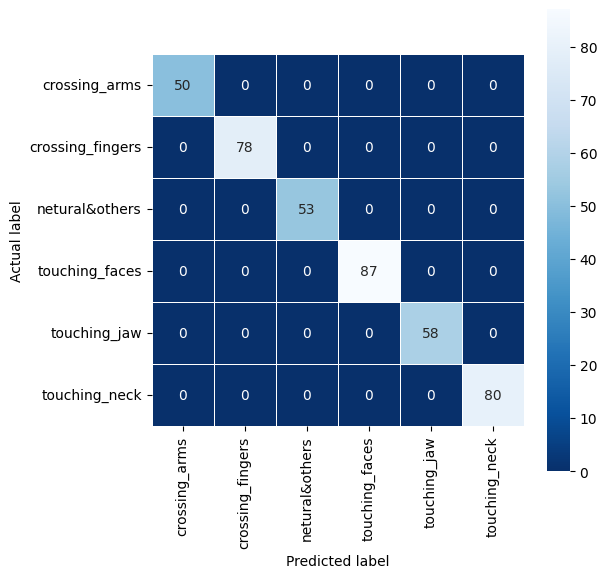

In [8]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_list, xticklabels=class_list)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
class_list

Index(['crossing_arms', 'crossing_fingers', 'netural&others', 'touching_faces',
       'touching_jaw', 'touching_neck'],
      dtype='object')

In [45]:
x_test

,NOSE_x,NOSE_y,NOSE_z,NOSE_v,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_v,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_INDEX_z,RIGHT_INDEX_v,LEFT_THUMB_x,LEFT_THUMB_y,LEFT_THUMB_z,LEFT_THUMB_v,RIGHT_THUMB_x,RIGHT_THUMB_y,RIGHT_THUMB_z,RIGHT_THUMB_v
1124,-0.030917,-0.377813,-1.089086,0.999982,0.005221,-0.456314,-1.035281,0.999940,0.035691,-0.453038,...,-1.287330,0.672681,0.086569,-0.107255,-1.175028,0.995052,-0.027445,0.664767,-1.267257,0.695854
1151,-0.033964,-0.386561,-1.011680,0.999992,0.004561,-0.465922,-0.945993,0.999974,0.034963,-0.464006,...,-1.099177,0.898961,0.090950,-0.110897,-1.077115,0.996183,-0.028016,0.653366,-1.104672,0.902766
1481,0.164963,-0.601413,-1.104835,0.998127,0.163289,-0.691265,-1.001233,0.996527,0.182005,-0.689189,...,-1.052351,0.632219,-0.072887,0.200397,-0.748686,0.715895,0.510609,0.717131,-1.034636,0.665398
1493,0.027907,-0.404760,-0.856398,0.998242,0.058246,-0.470744,-0.787983,0.996903,0.080682,-0.469896,...,-0.982534,0.502649,0.104028,-0.186929,-1.480745,0.724820,-0.090300,0.862774,-0.914442,0.548087
1356,0.144578,-0.685104,-0.731443,0.997826,0.150731,-0.770737,-0.587962,0.997308,0.171186,-0.766454,...,-1.663762,0.842091,-0.003391,0.292920,-1.147860,0.817796,-0.144067,-0.268031,-1.602949,0.853429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.072174,-0.476693,-1.391800,0.999728,0.118969,-0.562163,-1.295925,0.999426,0.142915,-0.556952,...,-2.307551,0.849601,0.178253,0.688855,-1.690445,0.663893,-0.030001,0.794566,-2.083107,0.830474
1005,0.001499,-0.464196,-2.147319,0.997428,0.020819,-0.564612,-2.088065,0.995112,0.042560,-0.568642,...,-2.701487,0.780007,0.134291,0.887552,-1.780736,0.324584,-0.114912,-0.208229,-2.615040,0.790368
322,0.069991,-0.484970,-1.271224,0.999733,0.115419,-0.567318,-1.180056,0.999433,0.139778,-0.560970,...,-2.293935,0.846397,0.171734,0.696435,-1.808585,0.682874,-0.024409,0.784787,-2.057131,0.827386
1000,-0.011311,-0.429350,-1.879427,0.998433,0.009503,-0.521879,-1.820014,0.996652,0.031244,-0.525161,...,-2.231282,0.828326,-0.032844,0.885062,-1.071871,0.412779,-0.118309,-0.183540,-2.178430,0.839204


In [50]:
from keras.utils import to_categorical
one_hot_label = to_categorical(y_test)
model_test.evaluate(x_test,one_hot_label)

13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000


[0.008605841547250748, 1.0]

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               47616     
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 180486 (705.02 KB)
Trainable params: 180486 (705.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
class_list

Index(['crossing_arms', 'crossing_fingers', 'netural&others', 'touching_faces',
       'touching_jaw', 'touching_neck'],
      dtype='object')

In [21]:
import pandas as pd
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import mediapipe as mp
import cv2
import math

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
col = []
total_landmark_list=[]
for i in range(23):
    name = mp_pose.PoseLandmark(i).name
    name_x = name + '_x'
    name_y = name + '_y'
    name_z = name + '_z'
    name_v = name + '_v'
    col.append(name_x)
    col.append(name_y)
    col.append(name_z)
    col.append(name_v)
image = cv2.imread("arms-crossed.jpg")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = pose.process(img_rgb)
pose_landmarks_list = result.pose_landmarks.landmark
max_distance = 0
center_x = (pose_landmarks_list[11].x +pose_landmarks_list[12].x)/2
center_y = (pose_landmarks_list[11].y +pose_landmarks_list[12].y)/2
normalized_list=[]
for k in range(23):
    distance = math.sqrt(
            (pose_landmarks_list[k].x - center_x)**2 + (pose_landmarks_list[k].y - center_y)**2)
    if(distance > max_distance):
        max_distance = distance
for k in range(23):
    normalized_list.append((pose_landmarks_list[k].x - center_x)/max_distance)
    normalized_list.append((pose_landmarks_list[k].y - center_y)/max_distance)
    normalized_list.append(pose_landmarks_list[k].z/max_distance)
    normalized_list.append(pose_landmarks_list[k].visibility)
total_landmark_list.append(normalized_list)
data = pd.DataFrame(total_landmark_list, columns=col)
prediction=model_test.predict(data)
maxindex = int(np.argmax(prediction))
print(class_list[maxindex])


1/1 [==============================] - 0s 22ms/step
crossing_arms
